<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Copy_of_TRAIN_YLC_Week_8_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 8: Supervised Learning Review**
---

### **Description**

In this week's lab, we will review everything we have seen so far this year. This is your chance to clarify any points of confusion and ultimately ensure your comfort with the fundamentals of supervised machine learning from exploratory data analysis to evaluating linear regression models.

<br>

### **Structure**

**Part 1**: [[OPTIONAL] Exploratory Data Analysis Review](#p1)

**Part 2**: [[OPTIONAL] Data Visualization Review](#p2)

**Part 3**: [[OPTIONAL] Linear Regression Review](#p3)

**Part 4**: [2015 World Happiness Report Project](#p4)


<br>

### **Learning Objectives**

By the end of this lab, you will:
* Understand how to perform exploratory data analysis before applying ML.
* Understand how to implement and evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)




<br>

**Run the code below before continuing.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: [OPTIONAL] Exploratory Data Analysis Review**
---


**Run the code cell below to create the DataFrame.**

In [ ]:
# Create a Pandas dataframe from the dictionary
df = pd.DataFrame({'U.S. State': ['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania'],
        'Population (in millions)': [38, 21, 6.5, 28, 13],
        'Capitol': ['Sacramento', 'Tallahassee', 'Indianapolis', 'Austin', 'Harrisburg'],
        'GDP ($ in billions)': [3700, 1070, 352, 1876, 726]})

#### **Problem #1.1**

What does `.head()` tell you about this DataFrame?

#### **Problem #1.2**

What is the datatype of `Population (in millions)`?

#### **Problem #1.3**

What is the average `Population (in millions)` size among the U.S. states in the dataset?

In [ ]:
print(df['Population (in millions)'].mean())

21.3


#### **Problem #1.4**

Explore rows 4 and 5. What are the U.S. States listed?

In [ ]:
print(df.iloc[3:5])

     U.S. State  Population (in millions)     Capitol  GDP ($ in billions)
3         Texas                      28.0      Austin                 1876
4  Pennsylvania                      13.0  Harrisburg                  726


#### **Problem #1.5**

Print all of the unique values for `GDP ($ in billions)`.

In [ ]:
print(df['GDP ($ in billions)'].unique())

[3700 1070  352 1876  726]


#### **Problem #1.6**

What are the column names in the dataset?

In [ ]:
print(df.columns)

Index(['U.S. State', 'Population (in millions)', 'Capitol',
       'GDP ($ in billions)'],
      dtype='object')


#### **Problem #1.7**

What is the total population across all states?

In [ ]:
print(df['Population (in millions)'].sum())

106.5


#### **Problem #1.8**

Which is the highest GDP in the dataset?

In [ ]:
print(df['GDP ($ in billions)'].max())

3700


#### **Problem #1.9**

What is the average population of the states?

In [ ]:
print(df['Population (in millions)'].mean())

21.3


#### **Problem #1.10**

What is the `Population (in millions)` for the 3rd state in the dataset?

In [ ]:
print(df.loc[2]['Population (in millions)'])

6.5


#### **Problem #1.11**

Which states are included in this dataset?

In [ ]:
print(df['U.S. State'].tolist())

['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania']


#### **Problem #1.12**

What is the range of GDP values among the states?

In [ ]:
print(df['GDP ($ in billions)'].max() - df['GDP ($ in billions)'].min())

3348


#### **Problem #1.13**

How many states have a population greater than 20 million?

In [ ]:
states_population_gt_20m = df[df['Population (in millions)'] > 20]
print(len(states_population_gt_20m))

3


#### **Problem #1.14**

Explore the last row in the dataset.

In [ ]:
print(df.iloc[-1])

U.S. State                  Pennsylvania
Population (in millions)            13.0
Capitol                       Harrisburg
GDP ($ in billions)                  726
Name: 4, dtype: object


### **[ADVANCED] Problem #1.15**

What is the average `GDP per capita` for the states? Divide `GDP per capita` by `Population (in millions)`.

In [ ]:
print(df['GDP ($ in billions)'] / df['Population (in millions)'].mean())

0    173.708920
1     50.234742
2     16.525822
3     88.075117
4     34.084507
Name: GDP ($ in billions), dtype: float64


<a name="p2"></a>

---
## **Part 2: [OPTIONAL] Data Visualization Review**
---

**Run the cell below to load in the data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


#### **Problem #2.1**

Create a scatterplot using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Gross Money vs. Runtime:
* `X-axis`: "Gross (USD)"
* `Y-axis`: "Runtime (min)"

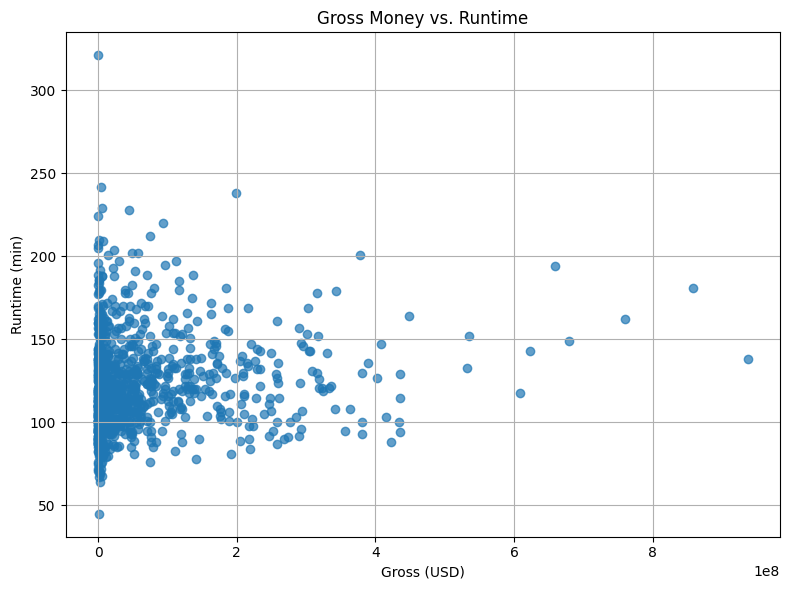

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(movie_df['Gross'], movie_df['Runtime (min)'], alpha=0.7)

plt.title('Gross Money vs. Runtime')
plt.xlabel('Gross (USD)')
plt.ylabel('Runtime (min)')

plt.grid(True)
plt.tight_layout()

plt.show()

#### **Problem #2.2**

Create a scatterplot using `Released_Year` as the x-axis value and `Runtime (min)` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Runtime vs. Released_Year"
* `X-axis`: "Year"
* `Y-axis`: "Runtime (min)"

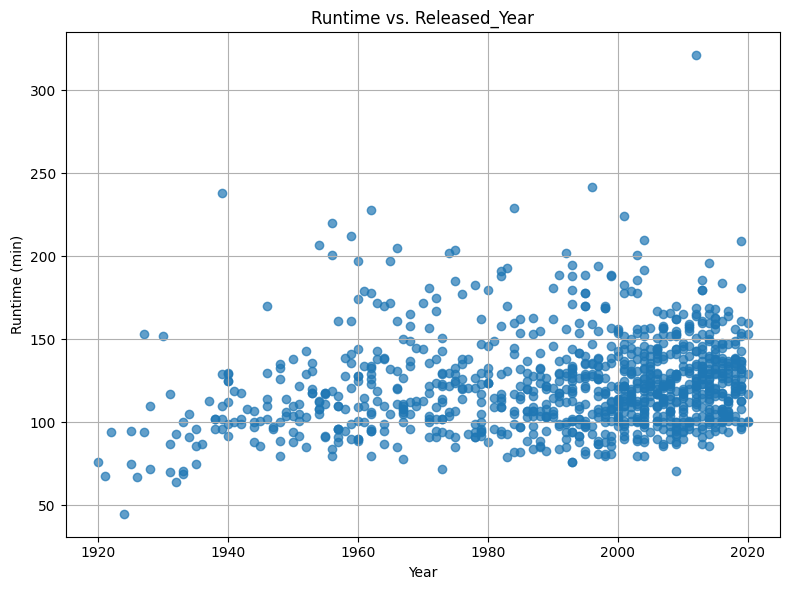

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(movie_df['Released_Year'], movie_df['Runtime (min)'], alpha=0.7)

plt.title('Runtime vs. Released_Year')
plt.xlabel('Year')
plt.ylabel('Runtime (min)')

plt.grid(True)
plt.tight_layout()

plt.show()

#### **Problem #2.3**

Create a *lineplot* using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

<br>

**NOTE**: This is not going to be a particularly helpful graph (the scatter plot is a better choice), but we oftentimes will not know this ahead of time. A lot of EDA and visualizations involves trying a number of things and seeing what is useful.

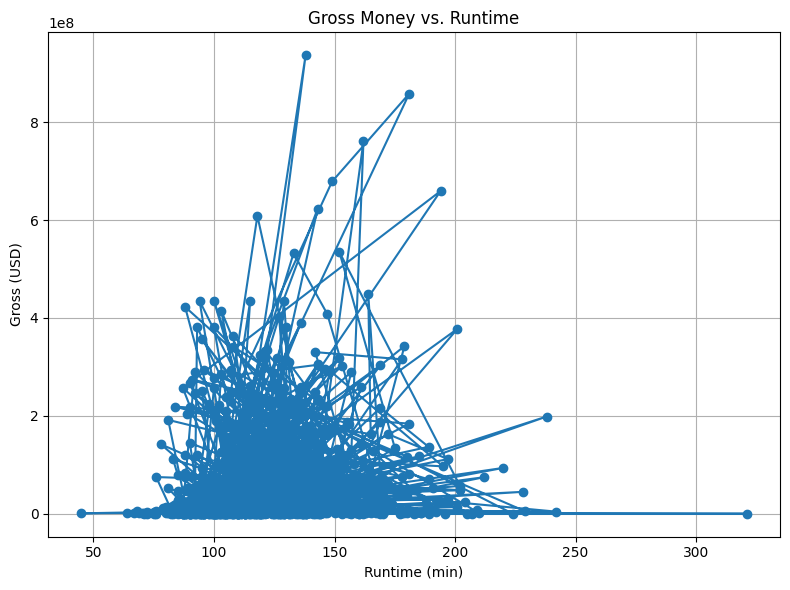

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(movie_df['Runtime (min)'], movie_df['Gross'], marker='o')

plt.title('Gross Money vs. Runtime')
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')

plt.grid(True)
plt.tight_layout()

plt.show()

#### **Problem #2.4**

Create a *lineplot* using `Released_Year` as the x-axis value and `Average Gross in Year` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Average Gross Money vs. Released Year'`.
* X-axis label.
* Y-axis label including units `'USD'`.

In [ ]:
mean_gross = movie_df.groupby('Released_Year')['Gross'].mean().reset_index()

#### **Problem #2.5**

Create a bar plot of the number of movies released per year.

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

<BarContainer object of 99 artists>

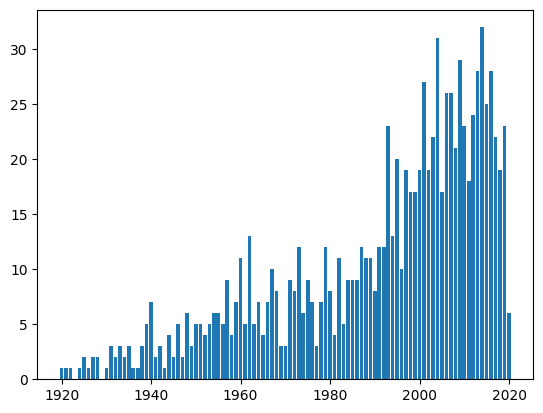

In [ ]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, movies_per_year.values)

#### **Problem #2.6**

Create a bar plot of the number of Dramas released per year.

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

<br>

**Hint**: Recall that you can use `.loc[CRITERIA, :]` to find all data matching given criteria and the example in Problem #6 for finding the number of movies realeased per year.

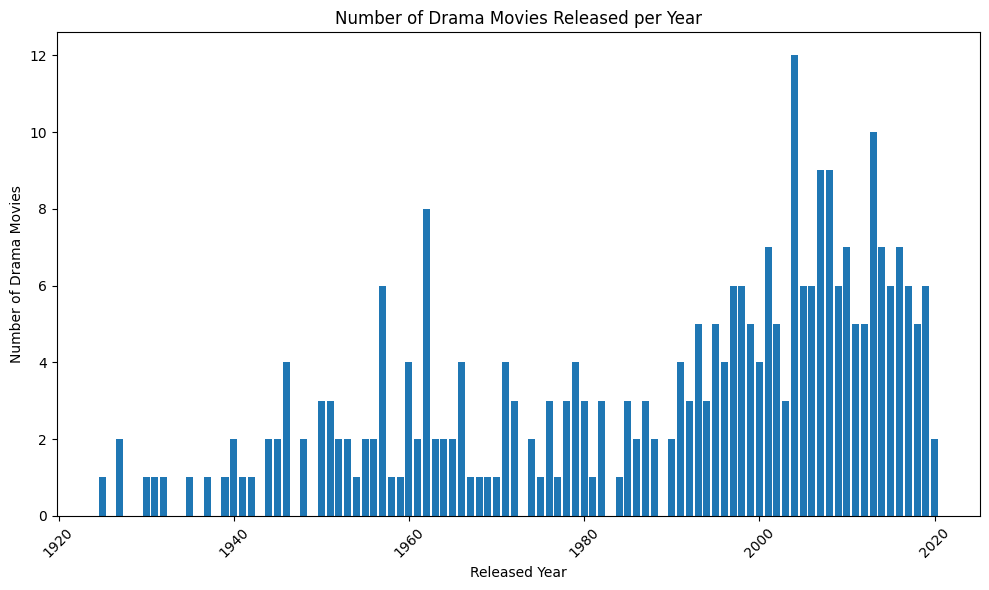

In [ ]:
drama_movies = movie_df.loc[movie_df['Genre'].str.contains('Drama', case=False)]

dramas_per_year = drama_movies['Released_Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(dramas_per_year.index, dramas_per_year.values)

plt.title('Number of Drama Movies Released per Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Drama Movies')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<a name="p3"></a>

---
## **Part 3: [OPTIONAL] Linear Regression Review**
---

In this part, we will model the relationship between the numerical features and the `Runtime (min)` variable as the label using linear regression.

#### **Step #1: Load the data**

Reload the data below, even if you did this in Part 2.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


#### **Step #2: Decide independent and dependent variables**

Examining the DataFrame, choose only the numerical variables (other than `Runtime (min)`) for the features and `Runtime (min)` for the label.


In [ ]:
features = movie_df.select_dtypes(include=['number']).drop(columns=['Runtime (min)'])
label = movie_df['Runtime (min)']

#### **Step #3: Split data into training and testing data**

Split the data using a 80 / 20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import your model**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [ ]:
model = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

##### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
```

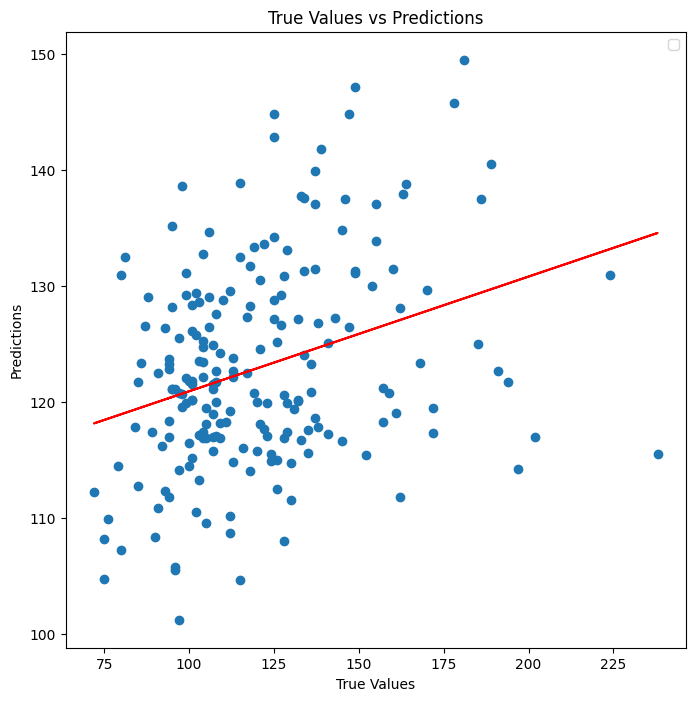

In [ ]:
import numpy as np

plt.figure(figsize=(8, 8))

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

plt.legend()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [ ]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

742.503745089591
0.09461668798421152


#### **Step #8: Use the model**

Using the model we created, predict the disease progression of two new patients:

* Patient 1:  age 45, bmi of 26.3, and average blood pressure of 98

* Patient 2:  age 39, bmi of 22.7, and average blood pressure of 114

**NOTE**: you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["AGE", "BMI", "BP"])
```

In [ ]:
movie_df.describe()

,Released_Year,Runtime (min),IMDB_Rating,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.903000,7.949300,2.736929e+05,6.245165e+07
std,23.285669,28.071865,0.275491,3.273727e+05,1.051148e+08
min,1920.000000,45.000000,7.600000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,5.552625e+04,2.351568e+06
50%,1999.000000,119.000000,7.900000,1.385485e+05,1.791714e+07
75%,2009.000000,137.000000,8.100000,3.741612e+05,7.410387e+07
max,2020.000000,321.000000,9.300000,2.343110e+06,9.366622e+08


<a name="p4"></a>

---
## **Part 4: 2015 World Happiness Report Project**
---

### **Description**
In this project, you will use what you have learned so far about the machine learning process and Linear Regression to analyze the official 2015 World Happiness Report from the United Nations. In particular, you will explore and visualize this data and then model the Happiness Score based on the variables reported in this dataset.

<br>


### **Overview**
For this project, you are given data collected for the 2015 UN Happiness Report. The 2015 Happiness Report, also known as the World Happiness Report 2015, is a publication that presents rankings of countries based on their levels of happiness and well-being. The report is a collaborative effort between the Sustainable Development Solutions Network (SDSN) and the Earth Institute at Columbia University, with contributions from various researchers and experts.

<br>

The report includes rankings of 158 countries based on the "World Happiness Index," which is calculated using survey data from the Gallup World Poll and other sources. The index combines factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption to assess overall happiness levels.

<br>

The 2015 Happiness Report sheds light on the relationship between happiness, well-being, and sustainable development, emphasizing the importance of incorporating measures of happiness into policy-making and development strategies. It provides valuable insights into global happiness levels, highlighting the factors that contribute to happiness and offering recommendations for policymakers and individuals to improve overall well-being.

<br>

 Everything you need is provided below. But, if you are curious to learn more the [official source can be found here](https://worldhappiness.report/ed/2015/#appendices-and-data). Here is a list of variables for your reference:

* `Country`: The country that the data corresponds to.

* `Region`: The region that this country is classified as belong to.

* `Happiness Score`: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* `GDP`: The extent to which GDP contributes to the calculation of the Happiness Score.

* `Social Support`: The extent to which Family contributes to the calculation of the Happiness Score

* `Health Life Expectancy`: The extent to which Life expectancy contributed to the calculation of the Happiness Score

* `Freedom`: The extent to which Freedom contributed to the calculation of the Happiness Score.

* `Corruption Perception`: The extent to which Perception of Corruption contributes to Happiness Score.

* `Generosity`: A model of the national average of response to the question “Have you donated money to a charity in the past month?” on GDP per
capita.

**NOTE**: All numerical variables except `Happiness Score` have already been standardized.

<br>

### **Key questions to answer**
1. How do these variables, such as `Generosity` or `Freedom`, influence a country's `Happiness Score`?

2. In 2015, which nation had the highest `Happiness Score`? Which nation had the lowest `Happiness Score`?

3. What patterns can be observed visually? What patterns can be observed with deeper data exploration?

<a name="p4.1"></a>

---
### **Part 4.1: Data Exploration, Wrangling, and Visualization**
---

In this part, you will load in and explore the dataset for this project. This will involve using functions from pandas as well as reading source material to understand the data that you are working with.

**NOTE**: In most real world situations, you will not do data exploration, wrangling, and visualization separately as we have done in the past. As such, you will simply be asked to perform tasks throughout this section without explicitly distinguishing between exploration, wrangling, and visualization.

<br>

**Run the code below to load in the data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv"

happy_df = pd.read_csv(url)

#### **Problem #4.1.1**

Spend a few minutes getting familiar with the data. Some things to consider: how many instances are there? How many features? What are the features' datatypes?

#### **Problem #4.1.2**

This data currently has no consistent naming convention for columns, which is very bad practice. So, rename each column to be of the style, `'Column Name'`, where each word is separated by a space (not an underscore, slash, or anything else) and starts uppercase. Furthermore, make sure all words are spelled correctly.

<br>

**Hint**: It may make you life easier to quickly print the current column names here using the `.columns` attribute.

In [ ]:
happy_df.columns = ['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support', 'Health Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity']
print(happy_df.head())

       Country          Region  Happiness Score      GDP  Social Support  \
0  Switzerland  Western Europe            7.587  1.39651         1.34951   
1      Iceland  Western Europe            7.561  1.30232         1.40223   
2      Denmark  Western Europe            7.527  1.32548         1.36058   
3       Norway  Western Europe            7.522  1.45900         1.33095   
4       Canada   North America            7.427  1.32629         1.32261   

   Health Life Expectancy  Freedom  Corruption Perception  Generosity  
0                 0.94143  0.66557                0.41978     0.29678  
1                 0.94784  0.62877                0.14145     0.43630  
2                 0.87464  0.64938                0.48357     0.34139  
3                 0.88521  0.66973                0.36503     0.34699  
4                 0.90563  0.63297                0.32957     0.45811  


#### **Problem #4.1.3**

Drop any duplicate rows.

In [ ]:
happy_df.drop_duplicates(inplace=True)

#### **Problem #4.1.4**

Determine the datatypes of each feature. Determine the number of non-null values in each column.

In [ ]:
print(happy_df.dtypes)
print(happy_df.count())

Country                    object
Region                     object
Happiness Score           float64
GDP                       float64
Social Support            float64
Health Life Expectancy    float64
Freedom                   float64
Corruption Perception     float64
Generosity                float64
dtype: object
Country                   158
Region                    157
Happiness Score           157
GDP                       158
Social Support            158
Health Life Expectancy    157
Freedom                   158
Corruption Perception     158
Generosity                158
dtype: int64


#### **Problem #4.1.5**

You should have seen from Problem #1.4 that there are 3 columns with null values. We need to either impute by filling with the average or drop the rows with null values.


Let's deal with these columns by type, specifically:
1. Impute or drop the numerical null values.
2. Impute or drop the object (string) null values.

##### **1. Impute or drop the numerical null values.**

Complete the code below to *drop* the numerical null values. There's an argument for dropping or imputing, but dropping is a safer choice that does not rely on making any assumptions about these variables.

In [ ]:
numerical_columns = happy_df.select_dtypes(include='number').columns
happy_df = happy_df.dropna(axis=0, how='any', subset=numerical_columns)
print(happy_df.columns[happy_df.isnull().any()].tolist())

['Region']


##### **2. Impute or drop the object (string) null values.**

Complete the code below to *impute* the object (string) null value(s). This is something we can look up, so it's completely reasonable to fill in the missing values manually and not have to sacrifice more data points.

<br>

**NOTE**: You will likely need to use the following three commands to accomplish this:

1. `happy_df[happy_df['column name'].isnull()]`: Print the specific data point(s) with a null value for `'column name'`.
2. `happy_df['column name'].unique()`: Print the possible values that we could use to fill in the null value found above.
3. `happy_df.loc[happy_df['column name'].isnull(), 'column name'] = 'non-null value'`: Fill in the null value with a new value. This should be the best option from the list of unique values found above.

In [ ]:
print(happy_df[happy_df['Region'].isnull()])

   Country Region  Happiness Score      GDP  Social Support  \
64   Libya    NaN            5.754  1.13145         1.11862   

    Health Life Expectancy  Freedom  Corruption Perception  Generosity  
64                  0.7038  0.41668                0.11023     0.18295  


In [ ]:
happy_df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       nan, 'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
happy_df.loc[happy_df['Region'].isnull(), 'Region'] = 'Western Europe'

#### **Problem #4.1.6**

Now that the data should be clean, take some time to understand the variables in this dataset, by looking at the [official statistical appendix/codebook here](https://s3.amazonaws.com/happiness-report/2015/StatisticalAppendixWHR3-April-16-2015.pdf) and answering the multiple choice questions below.

You will only need to refer to the first 2.5 pages of information, until they start mentioning the "expanded data set". You do not need to read anything after this.

<br>

**1. Which of the following best describes the `Happiness Score`?**

>**a.** We can also call this measure the "life ladder”.

>**b.** We can also call this measure the “objective well-being”.

>**c.** This is a measure of how many ladders people own in a country on average. The more ladders, the happier the people.

>**d.** Respondents were asked how happy they were on a scale of 1 - 10.

<br>

**2. How is `Social Support` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “If you were in trouble, would you have support?”

>**d.** Respondents were asked, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

<br>

**3. How is `Freedom` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

>**d.** Respondents were asked, “How free are you?”

In [ ]:
# d

In [ ]:
# d

In [ ]:
# c

#### **Problem #4.1.7**

Determine the average (mean) and standard deviation (std) of the numerical variables.

In [ ]:
print(happy_df.mean())
print(happy_df.std())

Happiness Score           5.360750
GDP                       0.844602
Social Support            0.988929
Health Life Expectancy    0.628669
Freedom                   0.428004
Corruption Perception     0.143960
Generosity                0.236874
dtype: float64
Happiness Score           1.142177
GDP                       0.403282
Social Support            0.273001
Health Life Expectancy    0.247780
Freedom                   0.150628
Corruption Perception     0.120321
Generosity                0.127258
dtype: float64


#### **Problem #4.1.8**

Determine all the regions that were included in this dataset.

In [ ]:
print(happy_df['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


#### **Problem #4.1.9**

Complete the code below to create a new feature called `Region Encoded` that encodes the regions into numerical values.

In [ ]:
region_list =  happy_df['Region'].unique()
region_map = {region_list[i]: i for i in range(len(region_list))}

happy_df['Region Encoded'] = happy_df['Region'].map(region_map)

happy_df.head()

,Country,Region,Happiness Score,GDP,Social Support,Health Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


#### **Problem #4.1.10**

Let's visualize some of the data and see if we can discover some relationships. Specifically, create bar graphs of `Happiness Score` for the countries in several different regions: `"Middle East and Northern Africa"`, `"Southern Asia"`, and `"North America"`.


**NOTE:** Some of the code has already been provided for the first example to help you get started.

##### **Middle East and Northern Africa**

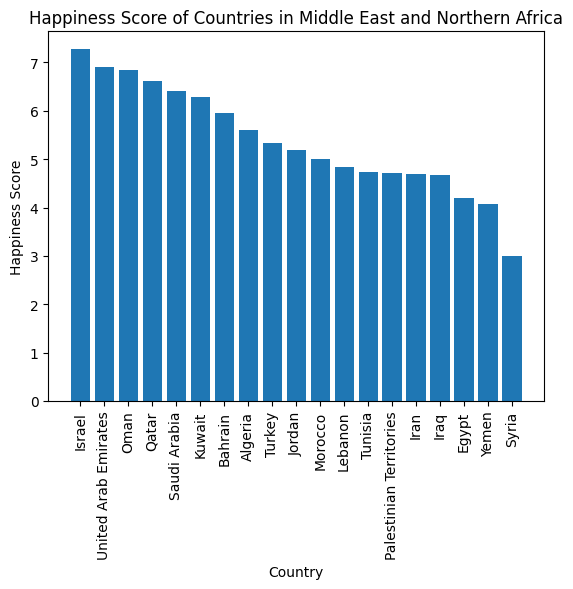

In [ ]:
x = happy_df[happy_df["Region"] == 'Middle East and Northern Africa']['Country']
y = happy_df[happy_df["Region"] == 'Middle East and Northern Africa']['Happiness Score']

plt.bar(x, y)

plt.title('Happiness Score of Countries in Middle East and Northern Africa')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)

plt.show()

##### **Southern Asia**

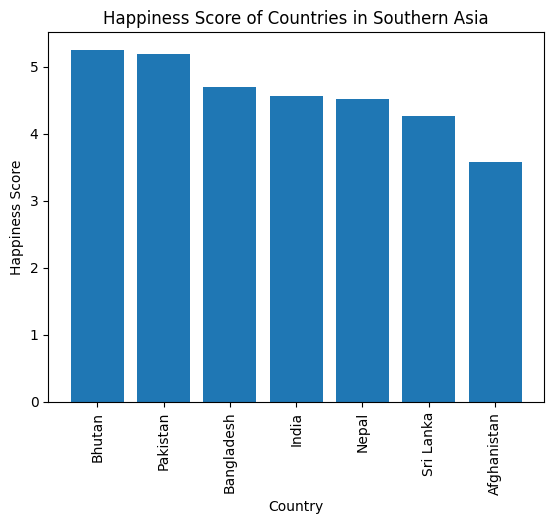

In [ ]:
x = happy_df[happy_df["Region"] == 'Southern Asia']['Country']
y = happy_df[happy_df["Region"] == 'Southern Asia']['Happiness Score']

plt.bar(x, y)

plt.title('Happiness Score of Countries in Southern Asia')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)

plt.show()

##### **North America**

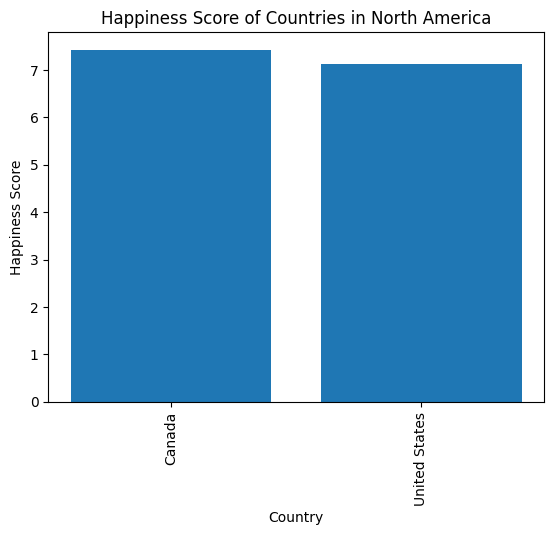

In [ ]:
x = happy_df[happy_df["Region"] == 'North America']['Country']
y = happy_df[happy_df["Region"] == 'North America']['Happiness Score']

plt.bar(x, y)

plt.title('Happiness Score of Countries in North America')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)

plt.show()

#### **Problem #4.1.11**

Now, create scatter plots of `Happiness Score` on the y-axis versus several different numerical variables on the x-axis: `Social Support`, `Freedom`, and `GDP`.

##### **Happiness Score vs. Social Support**

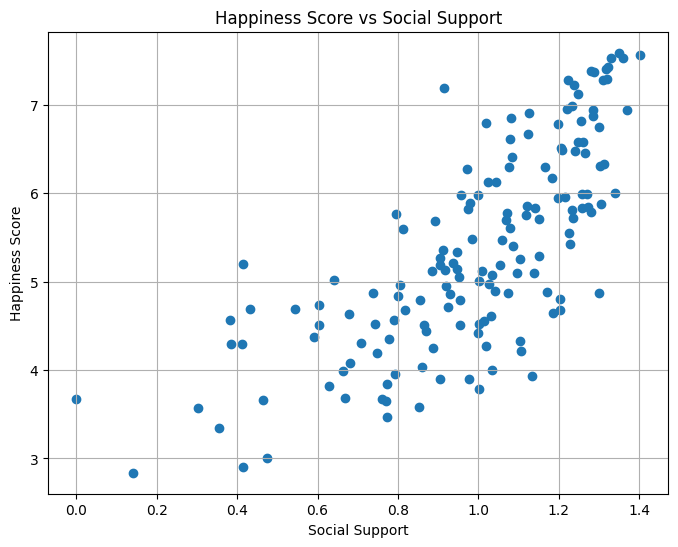

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(happy_df['Social Support'], happy_df['Happiness Score'])
plt.title('Happiness Score vs Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

##### **Happiness Score vs. Freedom**

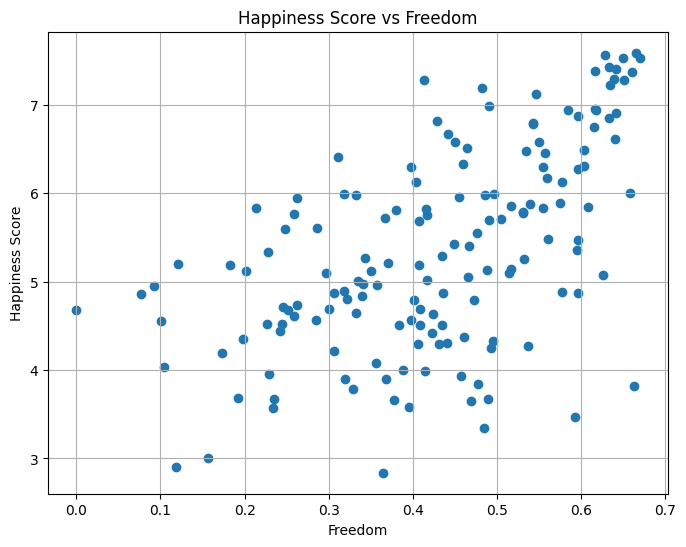

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(happy_df['Freedom'], happy_df['Happiness Score'])
plt.title('Happiness Score vs Freedom')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

##### **Happiness Score vs. GDP**

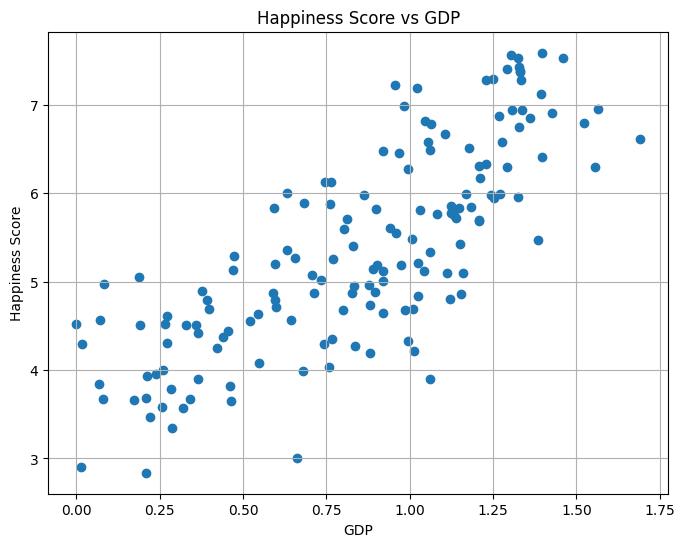

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(happy_df['GDP'], happy_df['Happiness Score'])
plt.title('Happiness Score vs GDP')
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

#### **Reflection Questions**

1. Is there a noticeable difference in happiness scores between different regions?
2. Does any region display a significant disparity between its country with the highest happiness score and its country with the lowest?
3. How do variables such as `Social Support`, `GDP`, and `Freedom` influence a country's happiness score? Do any variables seem to influence a country's happiness score more than others?
4. What are other relationships between variables that you think may be useful to visualize? What kind of data visualization graph would you use?
5. Consider the conceptual definitions of the features provided in the dataset. Are there any features that seem ambiguous or open to interpretation? How might these conceptual definitions impact the accuracy and reliability of the models when predicting happiness levels?
6. Reflect on the cultural and contextual factors that may influence the interpretation and relevance of the features in different countries. How might the meaning of a specific feature differ across diverse cultural and socioeconomic contexts?

<a name="p4.2"></a>

---
### **Part 4.2: Predicting Happiness Score**
---

Now you will create, evaluate, and train a machine learning model to predict the happiness score of a country based on the provided numerical features.

#### **Step #1: Load in the data**

This step was completed above.

#### **Step #2: Decide independent and dependent variables**

Complete the code below to decide the independent and dependent variables.

<br>

**NOTE**: The dependent variable (label) for all of Part 2 is `Happiness Score`. Using one of several pandas functions, you can determine the numerical features available and use them all as the independent variables.

In [ ]:
happy_df.select_dtypes(include='number').columns

Index(['Happiness Score', 'GDP', 'Social Support', 'Health Life Expectancy',
       'Freedom', 'Corruption Perception', 'Generosity', 'Region Encoded'],
      dtype='object')

In [ ]:
x = happy_df.drop(columns = ['Country', 'Region', 'Happiness Score'], axis = 1)
y = happy_df['Happiness Score']

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Step #4: Import the algorithm**

We are using `GDP`,	`Social Support`,	`Healthy Life Expectancy`, `Freedom`,	`Corruption Perception`, `Generosity`, and 	`Region Encoded` to predict `Happiness Score`. Which algorithm is best suited for this goal?

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the model and set hyperparameters**

For linear regression, there are no hyperparameters to set.

In [ ]:
model_1 = LinearRegression()

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.fit(X_train, y_train)

LinearRegression()

##### **2. Visualize the results.**

Compare the true test values versus the predicted values.

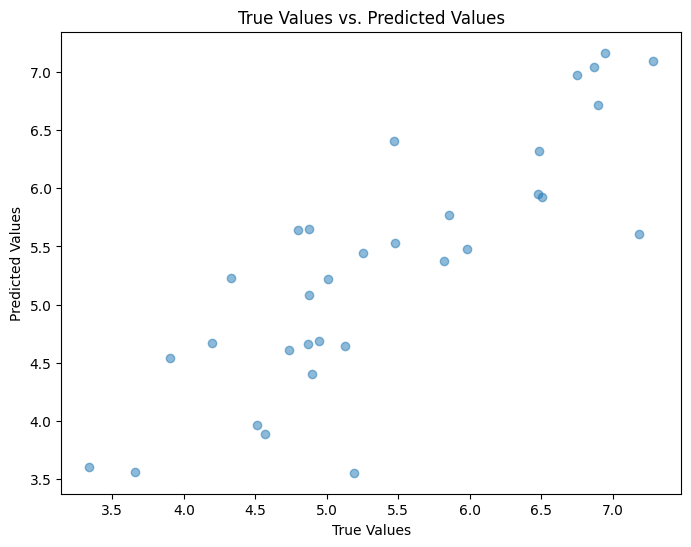

In [ ]:
y_pred = model_1.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

#### **Step #7: Evaluate the model's performance**

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

0.46537211257967565
0.3640738242066007
0.6033853032736219
0.673097520847959


#### **Step #8: Use the model**

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4

In [ ]:
# COUNTRY 1
new_country_data = [[0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 0]]
new_country = pd.DataFrame(new_country_data, columns=X_test.columns)

print(model_1.predict(new_country))

[4.81380173]


In [ ]:
# COUNTRY 2
new_country_data = [[0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 9]]
new_country = pd.DataFrame(new_country_data, columns=X_test.columns)

print(model_1.predict(new_country))

[4.2779189]


In [ ]:
# COUNTRY 3
new_country_data = [[1.1, 0.9, 1.01, 0.9, 0.1, 0.9, 4]]
new_country = pd.DataFrame(new_country_data, columns=X_test.columns)

print(model_1.predict(new_country))

[6.53900658]


##### **2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.**

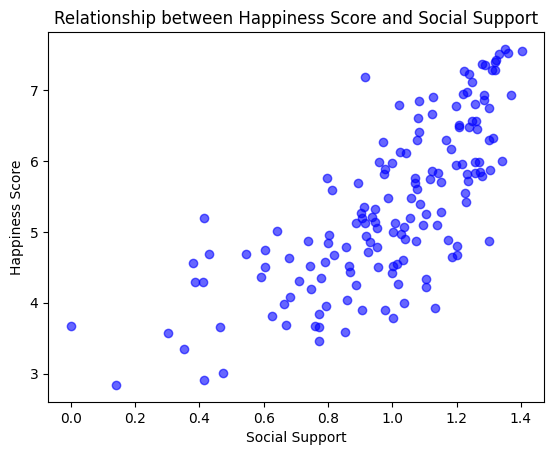

In [ ]:
plt.scatter(happy_df['Social Support'], happy_df['Happiness Score'], color='blue', alpha=0.6)
plt.title('Relationship between Happiness Score and Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

##### **3. Complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,GDP,Social Support,Health Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,0.83444,1.525323,0.462801,1.387974,0.659473,0.380985,-0.059543


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,2.361063


---
#End of Notebook

© 2023 The Coding School, All rights reserved